<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/RL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def value_iteration(p_head, goal=100, theta=1e-9):
    V = np.zeros(goal + 1)
    V[goal] = 1.0

    # States are 1 to 99
    states = range(1, goal)

    while True:
        delta = 0
        for s in states:
            old_v = V[s]

            actions = range(1, s + 1)
            action_returns = []

            for a in actions:
                s_win = min(s + a, goal)
                s_lose = s - a

                val = p_head * V[s_win] + (1 - p_head) * V[s_lose]
                action_returns.append(val)

            new_v = max(action_returns)
            V[s] = new_v
            delta = max(delta, abs(old_v - new_v))

        if delta < theta:
            break

    policy = np.zeros(goal + 1)
    for s in states:
        actions = range(1, s + 1)
        action_returns = []
        for a in actions:
            s_win = min(s + a, goal)
            s_lose = s - a
            val = p_head * V[s_win] + (1 - p_head) * V[s_lose]
            action_returns.append(round(val, 5))

        best_action_idx = np.argmax(action_returns)
        policy[s] = actions[best_action_idx]

    return V, policy

In [7]:
scenarios = [
    {"p": 0.4, "label": "p_h = 0.4"},
    {"p": 0.55, "label": "p_h = 0.55"},
    {"p": 0.25, "label": "p_h = 0.25"}
]

results = []

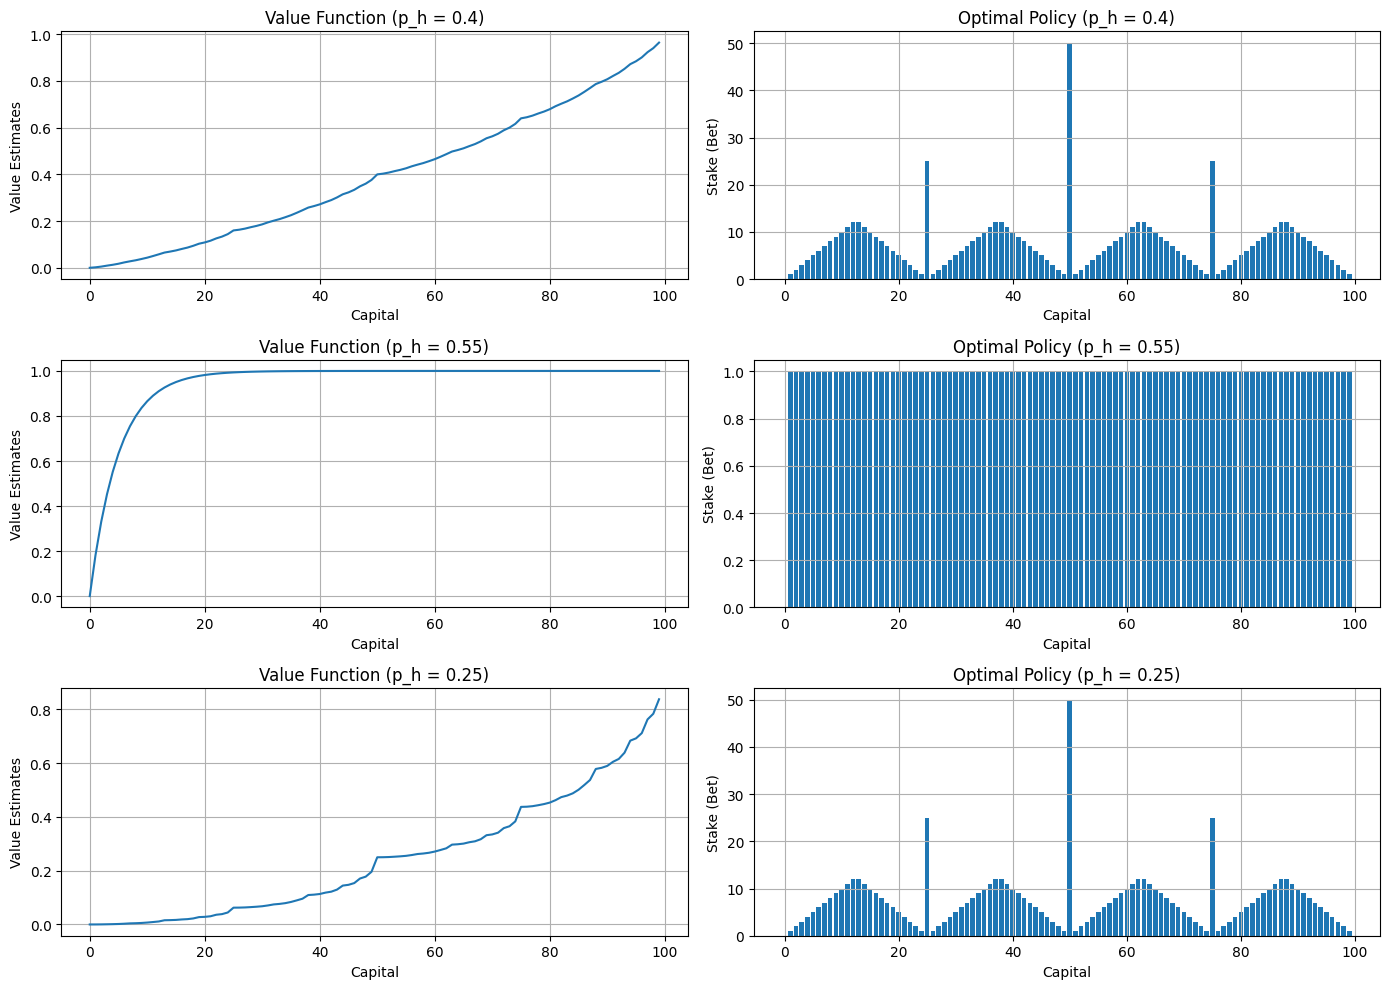

In [8]:
plt.figure(figsize=(14, 10))

for i, scen in enumerate(scenarios):
    p = scen["p"]
    label = scen["label"]

    V, policy = value_iteration(p_head=p)
    results.append((V, policy))

    # Plotting Value Function
    plt.subplot(3, 2, i*2 + 1)
    plt.plot(range(100), V[:100])
    plt.title(f"Value Function ({label})")
    plt.xlabel("Capital")
    plt.ylabel("Value Estimates")
    plt.grid(True)

    # Plotting Policy
    plt.subplot(3, 2, i*2 + 2)
    plt.bar(range(100), policy[:100], align='center')
    plt.title(f"Optimal Policy ({label})")
    plt.xlabel("Capital")
    plt.ylabel("Stake (Bet)")
    plt.grid(True)

plt.tight_layout()
plt.show()
